<h2>Subject: Computer Vision I


Group: 3
    
Authors: Angel Ontiveros, Lassi Laaksosaari
    
Excercise 2 </h2>

## Task 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgba2rgb
from skimage.color import rgb2gray
from PIL import Image
from skimage.transform import pyramid_gaussian
from skimage.transform import resize

photo_path = './visual_attention.png'


rgb_photo = rgba2rgb(imread(fname=photo_path))
grayscale = rgb2gray(rgb_photo)
center_pyramid = tuple(pyramid_gaussian(grayscale, max_layer=4, sigma=9))
surround_pyramid = tuple(pyramid_gaussian(grayscale, max_layer=4, sigma=16))

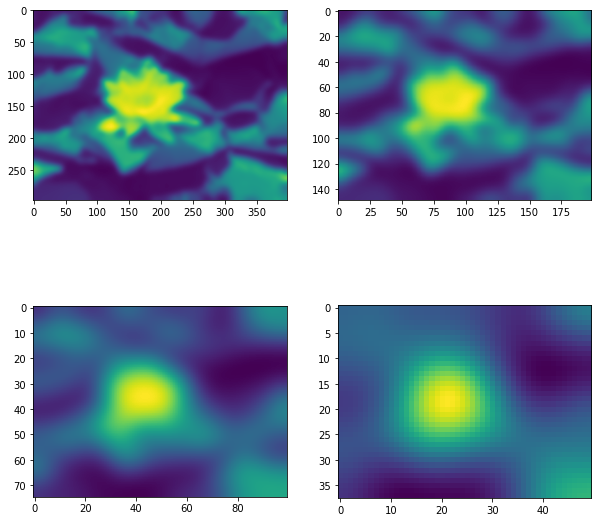

In [2]:
fig = plt.figure(figsize=(10,10))

for i in range(1, 5):
    fig.add_subplot(2,2, i)
    plt.imshow(center_pyramid[i])

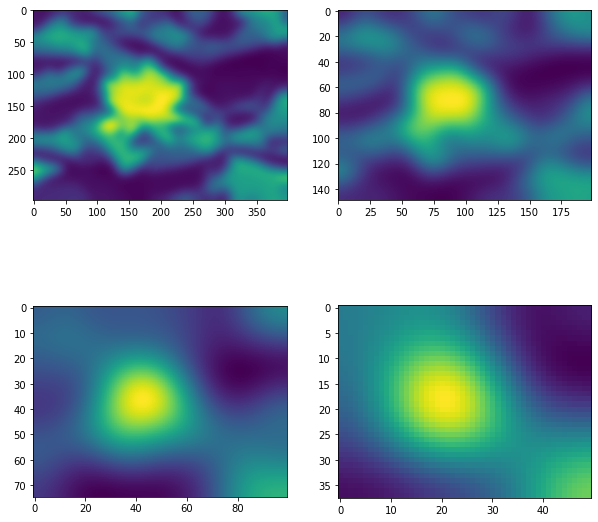

In [3]:
fig = plt.figure(figsize=(10,10))

for i in range(1, 5):
    fig.add_subplot(2,2, i)
    plt.imshow(surround_pyramid[i])


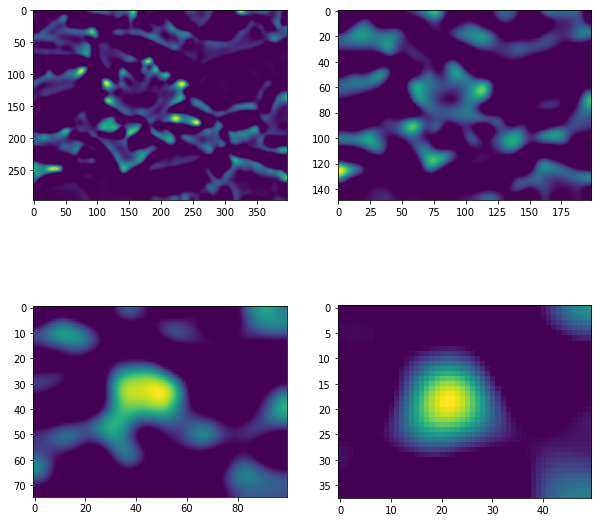

In [4]:
on_off_pyramid = [np.clip(center_pyramid[i]-surround_pyramid[i], 0, 1)  for i in range(1,5)]
fig = plt.figure(figsize=(10,10))
for i in range(1, 5):
    fig.add_subplot(2,2, i)
    plt.imshow(on_off_pyramid[i-1])
plt.show()

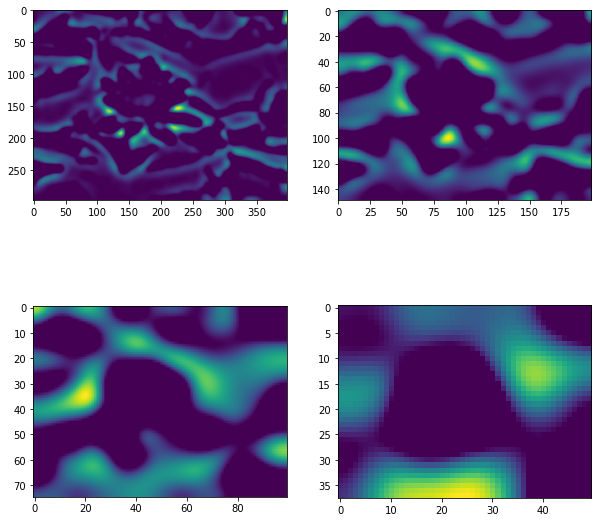

In [5]:
off_on_pyramid = [np.clip(surround_pyramid[i]-center_pyramid[i], 0, 1)  for i in range(1,5)]
fig = plt.figure(figsize=(10,10))
for i in range(1, 5):
    fig.add_subplot(2,2, i)
    plt.imshow(off_on_pyramid[i-1])
plt.show()

In [6]:
on_off_pyramid = [resize(photo, on_off_pyramid[0].shape) for photo in on_off_pyramid]
off_on_pyramid = [resize(photo, off_on_pyramid[0].shape) for photo in off_on_pyramid]

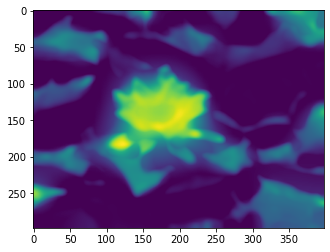

In [7]:
on_off_average = sum(on_off_pyramid)/4
plt.imshow(on_off_average)

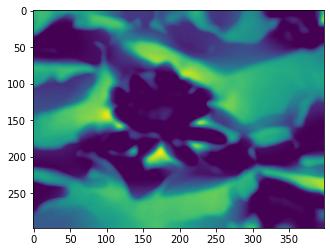

In [8]:
off_on_average = sum(off_on_pyramid)/4
plt.imshow(off_on_average)

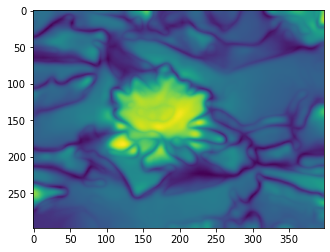

In [9]:
conspicuity_map = (off_on_average+on_off_average)/2
plt.imshow(conspicuity_map)

We can observe that conspicuity map that is shown in this excercise pinpoints edges more accurately than saliency map in previous excercise. This is due to combination of different smoothing levels of pyramid which enables us to see more precisely different types of edges. Also conspicuity map evens out contrast of the image and shows edges as dark lines which could be beneficial in some applications.